# Activation Functinos

Here's a list of some of the most commonly used activation functions in neural networks, along with their mathematical formulas, derivatives, and typical use cases:

1. **Sigmoid or Logistic Activation Function**
   - **Formula**: $\sigma(x) = \frac{1}{1 + e^{-x}}$
   - **Derivative**: $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$
   - **Intuition**: Sigmoid maps any input into the range between 0 and 1, making it useful for binary classification problems. However, it's susceptible to the vanishing gradient problem and is not often used in hidden layers of deep networks.


2. **Hyperbolic Tangent (tanh) Function**
   - **Formula**: $\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$
   - **Derivative**: $\tanh'(x) = 1 - \tanh^2(x)$
   - **Intuition**: Tanh is similar to the sigmoid function but maps inputs to a range between -1 and 1. It's often used in hidden layers of a neural network. Like the sigmoid, it can also suffer from the vanishing gradient problem.


3. **Rectified Linear Unit (ReLU) Function**
   - **Formula**: $ReLU(x) = \max(0, x)$
   - **Derivative**: $ReLU'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}$
   - **Intuition**: ReLU is commonly used in hidden layers of deep neural networks. It helps with the vanishing gradient problem and allows models to learn faster and perform better. However, it can suffer from the "dying ReLU" problem, where neurons can become inactive and always output zero.


4. **Leaky ReLU Function**
   - **Formula**: $LeakyReLU(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha x & \text{if } x \leq 0 \end{cases}$ (where $\alpha$ is a small constant)
   - **Derivative**: $LeakyReLU'(x) = \begin{cases} 1 & \text{if } x > 0 \\ \alpha & \text{if } x \leq 0 \end{cases}$
   - **Intuition**: It addresses the dying ReLU problem by allowing a small gradient when the unit is not active.


5. **Softmax Function**
   - **Formula**: $Softmax(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$ (applied to a vector)
   - **Derivative**: The derivative of the softmax function is a bit more complex as it involves partial derivatives. For each component $i$, the derivative depends on all the other components of the vector.
   - **Intuition**: Softmax is typically used in the output layer of a neural network for multi-class classification problems. It converts logits into probabilities by normalizing them into a probability distribution.


6. **Exponential Linear Unit (ELU) Function**
   - **Formula**: $ELU(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha(e^x - 1) & \text{if } x \leq 0 \end{cases}$ (where $\alpha$ is a hyperparameter)
   - **Derivative**: $ELU'(x) = \begin{cases} 1 & \text{if } x > 0 \\ ELU(x) + \alpha & \text{if } x \leq 0 \end{cases}$
   - **Intuition**: ELU can help improve learning characteristics compared to ReLU and its variants, by using an exponential function for negative inputs, thus smoothing the curve.


Each of these activation functions has specific advantages and can be more suitable for certain types of neural networks and tasks. The choice of activation function often depends on empirical results and the specific requirements of the task at hand.

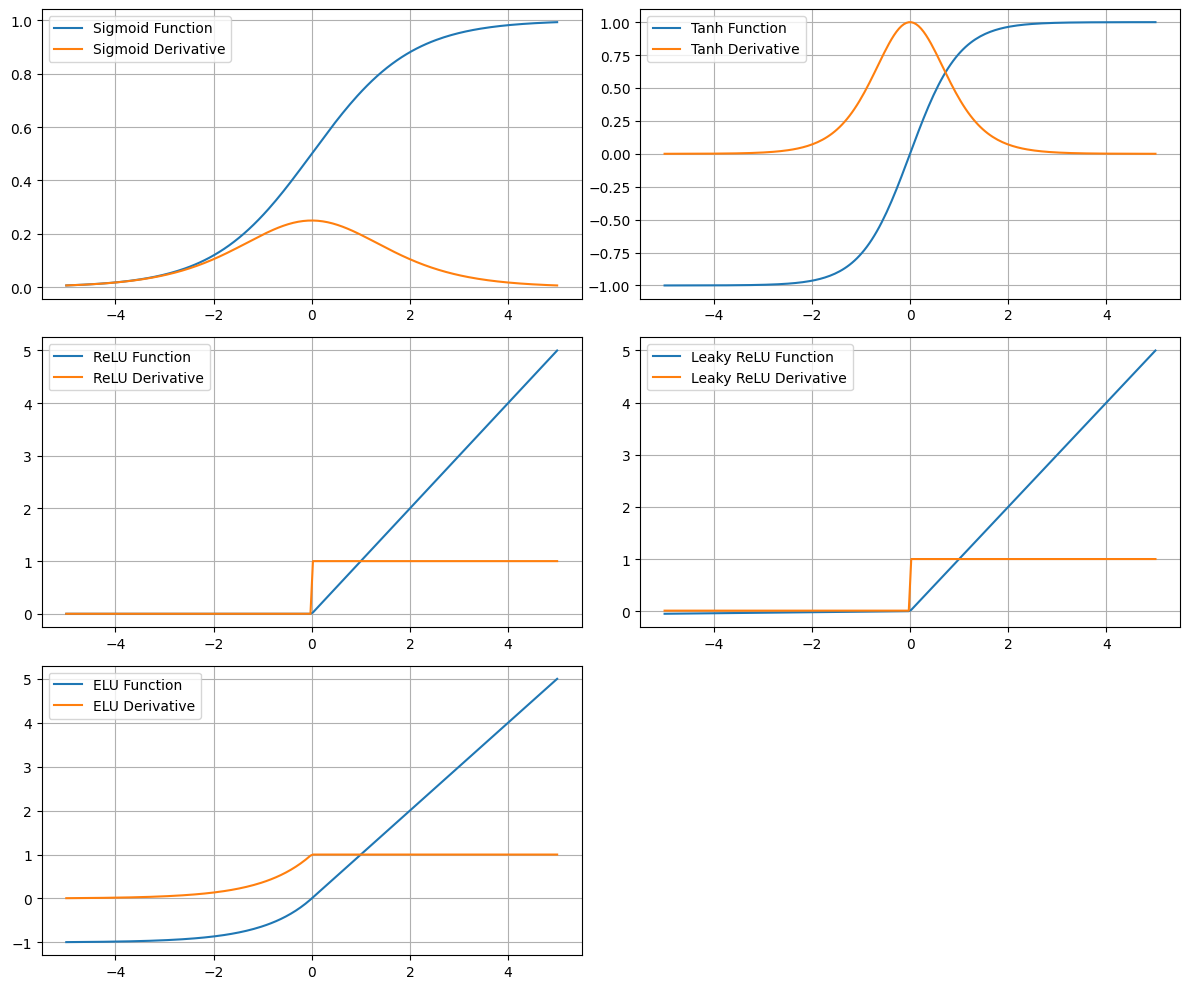

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for the input values
x = np.linspace(-5, 5, 200)

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Tanh function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# ReLU function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Leaky ReLU function and its derivative
alpha = 0.01
def leaky_relu(x):
    return np.where(x > 0, x, x * alpha)

def leaky_relu_derivative(x):
    return np.where(x > 0, 1, alpha)

# Softmax function and its derivative (applied element-wise for simplicity)
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Softmax derivative is complex and usually not needed in practice

# ELU function and its derivative
alpha_elu = 1.0
def elu(x):
    return np.where(x >= 0, x, alpha_elu * (np.exp(x) - 1))

def elu_derivative(x):
    return np.where(x >= 0, 1, elu(x) + alpha_elu)

# Plotting
functions = [sigmoid, tanh, relu, leaky_relu, elu]
derivatives = [sigmoid_derivative, tanh_derivative, relu_derivative, leaky_relu_derivative, elu_derivative]
function_names = ['Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU', 'ELU']

plt.figure(figsize=(12, 10))

for i in range(len(functions)):
    plt.subplot(3, 2, i+1)
    plt.plot(x, functions[i](x), label=f'{function_names[i]} Function')
    plt.plot(x, derivatives[i](x), label=f'{function_names[i]} Derivative')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


# Loss Functions

Sure, here's a list of commonly used loss functions in deep learning for classification, regression, and unsupervised learning tasks, along with their mathematical formulations, important hyperparameters, and typical use cases. These loss functions are available in Keras:

### Classification Tasks

1. **Binary Cross-Entropy Loss**
   - **Formula**: $-\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(p(y_i)) + (1 - y_i) \cdot \log(1 - p(y_i))]$
   - **Hyperparameters**: None
   - **Use**: Used for binary classification tasks. It measures the performance of a model whose output is a probability value between 0 and 1.

2. **Categorical Cross-Entropy Loss**
   - **Formula**: $-\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{M} y_{ic} \cdot \log(p_{ic})$
   - **Hyperparameters**: None
   - **Use**: Used for multi-class classification tasks where labels are one-hot encoded. It measures the performance of a model whose output is a probability distribution across multiple classes.

3. **Sparse Categorical Cross-Entropy Loss**
   - **Formula**: Same as categorical cross-entropy, but with integer labels
   - **Hyperparameters**: None
   - **Use**: Similar to categorical cross-entropy but used when the classes are mutually exclusive, and the labels are integers, not one-hot encoded.

### Regression Tasks

1. **Mean Squared Error (MSE) Loss**
   - **Formula**: $\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$
   - **Hyperparameters**: None
   - **Use**: Commonly used for regression tasks. It calculates the average squared difference between the estimated values and the actual value.

2. **Mean Absolute Error (MAE) Loss**
   - **Formula**: $\frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|$
   - **Hyperparameters**: None
   - **Use**: Also used for regression tasks. It calculates the average of the absolute differences between the predicted values and observed values.

3. **Huber Loss**
   - **Formula**: $\begin{cases} \frac{1}{2} (y_i - \hat{y}_i)^2 & \text{for } |y_i - \hat{y}_i| \le \delta \\ \delta \cdot (|y_i - \hat{y}_i| - \frac{1}{2} \delta) & \text{otherwise} \end{cases}$
   - **Hyperparameters**: Delta (δ), a threshold for switching between MSE and MAE
   - **Use**: Combines MSE and MAE. It's less sensitive to outliers than MSE.

### Unsupervised Learning Tasks

1. **Contrastive Loss**
   - **Formula**: $\frac{1}{2N} \sum_{i=1}^{N} (1 - y_i) \cdot D_{i}^2 + y_i \cdot \max(margin - D_{i}, 0)^2$
   - **Hyperparameters**: Margin
   - **Use**: Used in Siamese networks for tasks like verification, where the goal is to learn embeddings such that similar items are close to each other and dissimilar items are far apart.

2. **Kullback-Leibler (KL) Divergence Loss**
   - **Formula**: $KL(P || Q) = \sum P(x) \log \frac{P(x)}{Q(x)}$
   - **Hyperparameters**: None
   - **Use**: Used in tasks like autoencoders for distribution matching. It measures how one probability distribution diverges from a second, expected probability distribution.

Each of these loss functions has its specific applications and can significantly impact the performance of a deep learning model. The choice of a loss function depends on the nature of the problem (e.g., classification vs. regression), the distribution of the data, and the sensitivity required to outliers.

# Common Optimizers used in Deep LEarning

Certainly! Here's a chronological list of some of the most commonly used optimizers in deep learning, with explanations of the improvements each one introduces, along with simple explanations and their mathematical formulations:

1. **Stochastic Gradient Descent (SGD)**
   - **Improvement**: Basic form of gradient descent that updates parameters for each training example, unlike batch gradient descent.
   - **Intuition**: Moves in the direction of the steepest descent in loss, updating parameters with each example.
   - **Formula**: $\theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}, y^{(i)})$
   - **Enhancement**: The foundation of all optimizers, but can be slow and inefficient.

2. **Momentum**
   - **Improvement**: Addresses SGD's inefficiency by accelerating descent in relevant directions and dampening oscillations.
   - **Intuition**: Adds a fraction of the previous update to the current update, like a ball rolling downhill gaining momentum.
   - **Formula**: 
     $v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta)$
     $\theta = \theta - v_t$
   - **Enhancement**: Faster convergence than standard SGD, especially on surfaces with ravines or plateaus.

3. **Nesterov Accelerated Gradient (NAG)**
   - **Improvement**: A refined version of Momentum where the gradient is calculated at an ahead point in the direction of momentum.
   - **Intuition**: It's like having a glimpse of where you'll be tomorrow and adjusting your direction today accordingly.
   - **Formula**:
     $v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta - \gamma v_{t-1})$
     $\theta = \theta - v_t$
   - **Enhancement**: Often results in faster convergence than Momentum.

4. **Adagrad**
   - **Improvement**: Introduces adaptive learning rates for each parameter, making it suitable for sparse data.
   - **Intuition**: Gives infrequent parameters larger updates and frequent ones smaller updates.
   - **Formula**: 
     $\theta_{t+1,i} = \theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}} \cdot g_{t,i}$
   - **Enhancement**: Eliminates the need to manually set the learning rate. However, it can prematurely decrease the effective learning rate.

5. **RMSprop**
   - **Improvement**: Modifies Adagrad to fix its aggressively decreasing learning rates.
   - **Intuition**: Uses a moving average of squared gradients to normalize the gradient.
   - **Formula**:
     $E[g^2]_t = 0.9 E[g^2]_{t-1} + 0.1 g_t^2$
     $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$
   - **Enhancement**: Works well in non-stationary settings (e.g., recurrent neural networks).

6. **Adam (Adaptive Moment Estimation)**
   - **Improvement**: Combines ideas from Momentum and RMSprop.
   - **Intuition**: Keeps an exponentially decaying average of past gradients and squared gradients.
   - **Formula**:
     $m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$
     $v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$
     $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
     $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$
   - **Enhancement**: Efficient for large datasets and high-dimensional parameter spaces.

Each optimizer offers improvements over its predecessors, mainly in terms of convergence speed, stability, and ease of tuning. The choice of an optimizer can significantly affect the performance of a neural network, and often the choice is made based on empirical evidence specific to the task and dataset at hand.

[Disclaimer:]: ChatGPT Generated

- The choice of the optimizer in deep learning models often depends on the specific characteristics of the dataset and the nature of the problem. However, some general recommendations can be made based on the type of task:

### Regression Problems
- **Adam**: Often the first choice for many regression problems due to its efficient computation and low memory requirement. It works well with large datasets.
- **RMSprop**: Also a good choice for regression, especially for non-stationary objectives, as it adjusts the learning rate during training.

### Classification Problems
- **Adam**: Its adaptive learning rate properties make it suitable for classification tasks with large datasets and high-dimensional spaces, such as image and text classification.
- **SGD with Momentum or Nesterov Accelerated Gradient**: These can be effective for classification tasks, especially when fine-tuning pre-trained models or dealing with simpler datasets.

### Image Data
- **Adam**: Due to its adaptability and efficiency, Adam is frequently used in image-related tasks, including image classification, object detection, and segmentation.
- **SGD with Momentum**: Often used in training deep convolutional neural networks, especially when fine-tuning models pre-trained on large datasets like ImageNet.

### Text Data Classification
- **Adam**: Particularly effective for large-scale datasets common in natural language processing (NLP) tasks, including text classification.
- **RMSprop**: Also a good choice for text data, especially when dealing with recurrent neural networks (RNNs) or models with LSTM (Long Short-Term Memory) units.

### Key Points:
- **Adam** is generally a strong default choice due to its adaptability and effectiveness across a wide range of problem types.
- **SGD with Momentum** or **Nesterov Accelerated Gradient** can be more effective when you have a lot of data and computational resources and are fine-tuning models.
- For **text data** involving sequences and time-series, optimizers like **Adam** or **RMSprop** are often preferred due to their ability to adapt the learning rate for different parameters, which can be particularly beneficial for the kind of sparse data often seen in NLP.

It's important to note that these are general guidelines, and the optimal optimizer may vary based on the specific characteristics of the dataset and task. Additionally, the choice of other hyperparameters, like learning rate and batch size, and the network architecture itself, also plays a crucial role in model performance. Experimentation and cross-validation are often necessary to determine the best optimizer for a given problem.